In [2]:
# Библиотека для работы с данными
import pandas as pd

In [8]:
df = pd.read_csv('data.csv')

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# если надо указать свои заголовки и разделитель
# data = pd.read_csv('power.csv', names = ['страна', 'год', 'количество', 'категория'], sep = '\t', header=0)
# data.head()

In [11]:
# количество строк в датафрейме

len(df)

891

In [12]:
# или так
df.shape

(891, 12)

## Основные сведения о датафрейме

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# Статистика
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# Список колонок
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
# Значение в колонке
df['PassengerId'].head()

0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64

In [13]:
## Метод value_counts позволяет получить количество строк для каждого значения
## примените его к полю survived

In [14]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
## Метод unique позволяет получить список значений (уникальных) для столбца
## примените его к Embarked

In [16]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
# Фильтрация наборов колонок
df[['Pclass', 'Survived']].head()

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0


In [18]:
# Сводные таблицы
df[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [ ]:
## Посчитайте среднюю виживаемост в зависимости от пола
##

In [19]:
df[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


## Отображение данных

In [20]:
import matplotlib.pyplot as plt

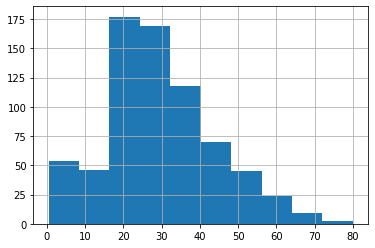

In [21]:
df['Age'].hist()

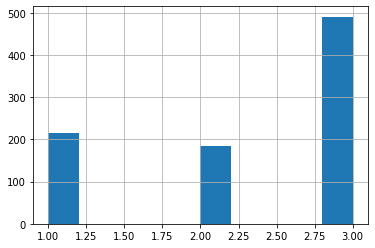

In [22]:
df['Pclass'].hist()

## Подготовим данные для машинного обучения

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Удалим колоноки, которые нам кажутся мало информативными
* Имя
* Билет
* Каюта
* Информацию по родственникам

In [24]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
## Постройте датафрейм df_filtered без этих колонок (Name, SibSp, Parch, Ticket, Cabin)

In [26]:
df_filtered = df[['Survived', 'Pclass', 'Sex', 'Age','Fare', 'Embarked']]

In [27]:
df_filtered.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [28]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


## Видим, что есть пустые значения, попробуем с ними разобраться

In [31]:
df_filtered['Age'].isna().head(100)

0     False
1     False
2     False
3     False
4     False
      ...  
95     True
96    False
97    False
98    False
99    False
Name: Age, Length: 100, dtype: bool

In [33]:
df_filtered['Age'][96]

71.0

In [34]:
df_filtered[df_filtered['Age'].isna()].head()

,Survived,Pclass,Sex,Age,Fare,Embarked
5,0,3,male,NaN,8.4583,Q
17,1,2,male,NaN,13.0000,S
19,1,3,female,NaN,7.2250,C
26,0,3,male,NaN,7.2250,C
28,1,3,female,NaN,7.8792,Q


## Посчитаем средний возраст и заменим им пропущенные значения

In [35]:
df_filtered['Age'].mean()

29.69911764705882

In [36]:
df_filtered['Age_rep'] = df_filtered['Age'].fillna(29.69)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
Fare        891 non-null float64
Embarked    889 non-null object
Age_rep     891 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 48.9+ KB


## Аналогично заменим неизвестный пункт назначения на самый вероятный

In [ ]:
## Практика

In [38]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [39]:
df_filtered['Embarked_rep'] = df_filtered['Embarked'].fillna('S')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived        891 non-null int64
Pclass          891 non-null int64
Sex             891 non-null object
Age             714 non-null float64
Fare            891 non-null float64
Embarked        889 non-null object
Age_rep         891 non-null float64
Embarked_rep    891 non-null object
dtypes: float64(3), int64(2), object(3)
memory usage: 55.8+ KB


In [41]:
df_filtered.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_rep,Embarked_rep
0,0,3,male,22.0,7.2500,S,22.0,S
1,1,1,female,38.0,71.2833,C,38.0,C
2,1,3,female,26.0,7.9250,S,26.0,S
3,1,1,female,35.0,53.1000,S,35.0,S
4,0,3,male,35.0,8.0500,S,35.0,S


## Разберемся с полом. Добавим столбец is_male

In [42]:
df_filtered['Sex'] == 'male'

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: Sex, Length: 891, dtype: bool

In [43]:
df_filtered['is_male'] = df_filtered['Sex'] == 'male'

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
df_filtered.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_rep,Embarked_rep,is_male
0,0,3,male,22.0,7.2500,S,22.0,S,True
1,1,1,female,38.0,71.2833,C,38.0,C,False
2,1,3,female,26.0,7.9250,S,26.0,S,False
3,1,1,female,35.0,53.1000,S,35.0,S,False
4,0,3,male,35.0,8.0500,S,35.0,S,True


## Профильтруем

In [45]:
df_filtered.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Age_rep',
       'Embarked_rep', 'is_male'],
      dtype='object')

In [47]:
df_filtered = df_filtered[['Survived', 'Pclass', 'Fare', 'Age_rep', 'Embarked_rep', 'is_male']]

In [48]:
df_filtered.head()

,Survived,Pclass,Fare,Age_rep,Embarked_rep,is_male
0,0,3,7.2500,22.0,S,True
1,1,1,71.2833,38.0,C,False
2,1,3,7.9250,26.0,S,False
3,1,1,53.1000,35.0,S,False
4,0,3,8.0500,35.0,S,True


## Осталось заменить Embarked_rep на цифры. Используем принцип one_hot

In [49]:
df_filtered = pd.get_dummies(df_filtered, ['Embarked_rep'])

In [50]:
df_filtered.head()

,Survived,Pclass,Fare,Age_rep,is_male,Embarked_rep_C,Embarked_rep_Q,Embarked_rep_S
0,0,3,7.2500,22.0,True,0,0,1
1,1,1,71.2833,38.0,False,1,0,0
2,1,3,7.9250,26.0,False,0,0,1
3,1,1,53.1000,35.0,False,0,0,1
4,0,3,8.0500,35.0,True,0,0,1


# Переходим к машинному обучению :-)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import  SVC

In [52]:
df_filtered.columns

Index(['Survived', 'Pclass', 'Fare', 'Age_rep', 'is_male', 'Embarked_rep_C',
       'Embarked_rep_Q', 'Embarked_rep_S'],
      dtype='object')

In [54]:
# Формируем признаки и целевую переменную
X, y = df_filtered[['Pclass', 'Fare', 'Age_rep', 'is_male', 'Embarked_rep_C', 'Embarked_rep_Q', 'Embarked_rep_S']], df_filtered['Survived']

In [ ]:
# Разделяем данные на данные для обучения и проверки

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
X_train.head()

,Pclass,Fare,Age_rep,is_male,Embarked_rep_C,Embarked_rep_Q,Embarked_rep_S
14,3,7.8542,14.00,False,0,0,1
841,2,10.5000,16.00,True,0,0,1
315,3,7.8542,26.00,False,0,0,1
125,3,11.2417,12.00,True,1,0,0
241,3,15.5000,29.69,False,0,1,0


In [57]:
y_train.head()

14     0
841    0
315    1
125    1
241    1
Name: Survived, dtype: int64

In [58]:
# Приводим данные к одному масштабу
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
X_train

array([[ 0.84232877, -0.49793666, -1.21889044, ..., -0.47261792,
        -0.308844  ,  0.60764362],
       [-0.3571474 , -0.4441156 , -1.06460956, ..., -0.47261792,
        -0.308844  ,  0.60764362],
       [ 0.84232877, -0.49793666, -0.29320517, ..., -0.47261792,
        -0.308844  ,  0.60764362],
       ...,
       [-0.3571474 , -0.39326042, -0.00855695, ..., -0.47261792,
        -0.308844  ,  0.60764362],
       [ 0.84232877, -0.36367898, -0.00855695, ...,  2.11587407,
        -0.308844  , -1.64570147],
       [-1.55662356,  3.64133547, -0.06178386, ..., -0.47261792,
        -0.308844  ,  0.60764362]])

In [60]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [61]:
X_train.head()

,Pclass,Fare,Age_rep,is_male,Embarked_rep_C,Embarked_rep_Q,Embarked_rep_S
0,0.842329,-0.497937,-1.218890,-1.380624,-0.472618,-0.308844,0.607644
1,-0.357147,-0.444116,-1.064610,0.724310,-0.472618,-0.308844,0.607644
2,0.842329,-0.497937,-0.293205,-1.380624,-0.472618,-0.308844,0.607644
3,0.842329,-0.429028,-1.373171,0.724310,2.115874,-0.308844,-1.645701
4,0.842329,-0.342405,-0.008557,-1.380624,-0.472618,3.237881,-1.645701


## Обучаем наши модели

In [62]:
logistic = LogisticRegression()


In [63]:
logistic.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
## Обучите модель SVC


In [65]:
svc_model=SVC()

In [66]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## Оценим качество

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [68]:
accuracy_score(y_test, logistic.predict(X_test))

0.7821229050279329

In [69]:
precision_score(y_test, logistic.predict(X_test))

0.7058823529411765

In [70]:
recall_score(y_test, logistic.predict(X_test))

0.7164179104477612

In [71]:
f1_score(y_test, logistic.predict(X_test))

0.7111111111111111

In [72]:
accuracy_score(y_test, tree.predict(X_test))

0.776536312849162

In [73]:
precision_score(y_test, tree.predict(X_test))

0.684931506849315

In [74]:
recall_score(y_test, tree.predict(X_test))

0.746268656716418

In [75]:
f1_score(y_test, tree.predict(X_test))

0.7142857142857143

In [ ]:
## Посчитайте метрики для SVC

In [76]:
accuracy_score(y_test, svc_model.predict(X_test))

0.8268156424581006

In [77]:
precision_score(y_test, svc_model.predict(X_test))

0.8461538461538461

In [78]:
recall_score(y_test, svc_model.predict(X_test))

0.6567164179104478

In [79]:
f1_score(y_test, svc_model.predict(X_test))

0.7394957983193277